In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv(r"C:\Users\karthik n\OneDrive\Desktop\cricket players\stack overflow\final_data.csv")

In [3]:
df = data.copy()

In [4]:
df

,title,body,tags
0,using std::filesystem with g++ 12.1.0 raises &...,I'm upgrading my compiler from g++ 8.2.0 to 12...,"c++, encoding, utf-8"
1,How could I link executable code to dynamic li...,I have cross platform dynamic library and exec...,"c++, dynamic-linking"
2,Can explicit object member functions be called...,Consider the following: https://godbolt.org/z/...,"c++, language-lawyer, explicit-object-parameter"
3,What is this &quot;template(bool Other)( requi...,I was looking at how concat_view was implement...,"c++, templates, c++-concepts, range-v3"
4,Sort any container,"I have a function, that takes a std container ...","c++, algorithm, sorting, templates, containers"
...,...,...,...
26195,PowerBI totals change based on chart type,I've run into an interesting issue today with ...,"powerbi, dax"
26196,Bank Days (Working Business Days) Connected To...,How do I show the working days for 2023 and 20...,"sorting, date, powerbi, calendar"
26197,Slicer increment button in PowerBI,Is it possible to create a button that would i...,powerbi
26198,Multi-level hierarchy powerbi,Today i have this structure in a table :\nhttp...,powerbi


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26200 entries, 0 to 26199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   26200 non-null  object
 1   body    26200 non-null  object
 2   tags    26200 non-null  object
dtypes: object(3)
memory usage: 614.2+ KB


In [104]:
df.shape

(26200, 3)

In [105]:
df.isna().sum()

title    0
body     0
tags     0
dtype: int64

In [106]:
# if any missing values there
# df.dropna(inplace=True)

In [107]:
df.duplicated().sum()

517

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

In [110]:
df.describe(include='all')

,title,body,tags
count,25683,25683,25683
unique,25217,25683,17119
top,"Using vectors to manipulate columns, and add n...",I'm upgrading my compiler from g++ 8.2.0 to 12...,"excel, vba"
freq,2,1,546


In [111]:
df.columns

Index(['title', 'body', 'tags'], dtype='object')

## Simple EDA

In [112]:
def simple_eda(data,column):
    import emoji
    import string
    import re
    
    lower_upper = data[column].apply(lambda x:False if (x.islower()) or (x.isupper()) else True).sum()
    html_xml = data[column].apply(lambda x: True if re.search("<.*?>",x)else False).sum()
    urls = data[column].apply(lambda x: True if re.search("https?://\S+",x)else False).sum()
    mails = data[column].apply(lambda x: True if re.search("\S+@\S+",x)else False).sum()
    mentions = data[column].apply(lambda x: True if re.search("\B[@#]\S+",x)else False).sum()
    emojis = data[column].apply(lambda x: True if emoji.emoji_count(x) else False).sum()
    digits = data[column].apply(lambda x: True if re.search("\d",x)else False).sum()
    puncs = data[column].apply(lambda x: True if re.search('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]',x)else False).sum()
    dates = data[column].apply(lambda x: True if re.search("\d{1,2}/\d{1,2}/\d{4}",x)else False).sum()

    if lower_upper>0:
        print("have both lower and upper case")
    if html_xml>0:
        print("have tages")
    if urls>0:
        print("have urls")
    if mails>0:
        print("have mails")
    if mentions>0:
        print("have mentions")
    if emojis>0:
        print("have emojis")
    if digits>0:
        print("have digits")
    if puncs>0:
        print("have punctuations")
    if dates>0:
        print("have dates")

In [113]:
simple_eda(df,"title")

have both lower and upper case
have tages
have urls
have mails
have mentions
have emojis
have digits
have punctuations


## Text Preprocessing

In [114]:
import re
import emoji
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer

In [115]:
stp = stopwords.words("english")
stp.remove("not")

In [117]:
def pre_proce(data, coln, case="lower", tages=True, urls=True, email=True, mentions=True,
              digits=True, dates=True, emojii=True, contractionss=True, stopwordss=True,
              infl="stem", stemms="porter", punc=True):

    ps = PorterStemmer()
    ls = LancasterStemmer()
    ss = SnowballStemmer(language="english")
    wl = WordNetLemmatizer()

    stp = stopwords.words("english")
    if "not" in stp:
        stp.remove("not")

    if emojii:
        data[coln] = data[coln].apply(lambda x: emoji.demojize(x, delimiters=('', '')))
    if case == "lower":
        data[coln] = data[coln].str.lower()
    elif case == "upper":
        data[coln] = data[coln].str.upper()
    if tages:
        data[coln] = data[coln].apply(lambda x: re.sub("<.*?>", "", x))
    if urls:
        data[coln] = data[coln].apply(lambda x: re.sub(r"https?://\S+", "", x))
    if email:
        data[coln] = data[coln].apply(lambda x: re.sub(r"\S+@\S+", "", x))
    if mentions:
        data[coln] = data[coln].apply(lambda x: re.sub(r"\B[@#]\S+", "", x))
    if digits:
        data[coln] = data[coln].apply(lambda x: re.sub(r"\d+", "", x))
    if dates:
        data[coln] = data[coln].apply(lambda x: re.sub(r"\b[0-9]{4}/[0-9]{1,2}/[0-9]{1,2}", "", x))
        data[coln] = data[coln].apply(lambda x: re.sub(r"\b[0-9]{1,2}/[0-9]{1,2}/[0-9]{4}", "", x))
    if contractionss:
        data[coln] = data[coln].apply(lambda x: contractions.fix(x))
    if stopwordss:
        filtered_docs = []
        for doc in data[coln]:
            words = word_tokenize(doc)
            filtered = [word for word in words if word.lower() not in stp]
            filtered_docs.append(" ".join(filtered))
        data[coln] = filtered_docs
    if infl == "stem":
        stemmed_docs = []
        for doc in data[coln]:
            tokens = word_tokenize(doc)
            if stemms == "porter":
                stemmed = [ps.stem(word) for word in tokens]
            elif stemms == "snow":
                stemmed = [ss.stem(word) for word in tokens]
            elif stemms == "lan":
                stemmed = [ls.stem(word) for word in tokens]
            stemmed_docs.append(" ".join(stemmed))
        data[coln] = stemmed_docs
    elif infl == "lemma":
        lemmatized_docs = []
        for doc in data[coln]:
            tokens = word_tokenize(doc)
            lemmatized = [wl.lemmatize(word) for word in tokens]
            lemmatized_docs.append(" ".join(lemmatized))
        data[coln] = lemmatized_docs
    if punc:
        data[coln] = data[coln].apply(lambda x: re.sub(r'[^\w\s]', "", x))
    return data


In [118]:
df["text"] = df["title"] + " " + df["body"]
df = pre_proce(df,"text")

In [32]:
#df.to_csv("final_data_stkof.csv")

### i saved data and run again

In [22]:
import pandas as pd
data1 = pd.read_csv(r"C:\Users\karthik n\final_data_stkof.csv")

In [23]:
df1 = data1.copy()

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25683 entries, 0 to 25682
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25683 non-null  int64 
 1   title       25683 non-null  object
 2   body        25683 non-null  object
 3   tags        25683 non-null  object
 4   text        25683 non-null  object
dtypes: int64(1), object(4)
memory usage: 1003.4+ KB


In [25]:
df1.drop(columns=["Unnamed: 0"],inplace=True)

In [26]:
df1.head()

,title,body,tags,text
0,using std::filesystem with g++ 12.1.0 raises &...,I'm upgrading my compiler from g++ 8.2.0 to 12...,"c++, encoding, utf-8",use std filesystem g rais quot not conver...
1,How could I link executable code to dynamic li...,I have cross platform dynamic library and exec...,"c++, dynamic-linking",could link execut code dynam librari cross pla...
2,Can explicit object member functions be called...,Consider the following: https://godbolt.org/z/...,"c++, language-lawyer, explicit-object-parameter",explicit object member function call pointer a...
3,What is this &quot;template(bool Other)( requi...,I was looking at how concat_view was implement...,"c++, templates, c++-concepts, range-v3",quot templat bool requir classnam q...
4,Sort any container,"I have a function, that takes a std container ...","c++, algorithm, sorting, templates, containers",sort contain function take std contain oper ...


In [27]:
df1.isna().sum()

title    0
body     0
tags     0
text     0
dtype: int64

In [28]:
df1.duplicated().sum()

0

## Feature Engineering

In [29]:
df1["tag_list"] = df1["tags"].apply(lambda x: x.split(", "))

In [30]:
df1.head()

,title,body,tags,text,tag_list
0,using std::filesystem with g++ 12.1.0 raises &...,I'm upgrading my compiler from g++ 8.2.0 to 12...,"c++, encoding, utf-8",use std filesystem g rais quot not conver...,"[c++, encoding, utf-8]"
1,How could I link executable code to dynamic li...,I have cross platform dynamic library and exec...,"c++, dynamic-linking",could link execut code dynam librari cross pla...,"[c++, dynamic-linking]"
2,Can explicit object member functions be called...,Consider the following: https://godbolt.org/z/...,"c++, language-lawyer, explicit-object-parameter",explicit object member function call pointer a...,"[c++, language-lawyer, explicit-object-parameter]"
3,What is this &quot;template(bool Other)( requi...,I was looking at how concat_view was implement...,"c++, templates, c++-concepts, range-v3",quot templat bool requir classnam q...,"[c++, templates, c++-concepts, range-v3]"
4,Sort any container,"I have a function, that takes a std container ...","c++, algorithm, sorting, templates, containers",sort contain function take std contain oper ...,"[c++, algorithm, sorting, templates, containers]"


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25683 entries, 0 to 25682
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     25683 non-null  object
 1   body      25683 non-null  object
 2   tags      25683 non-null  object
 3   text      25683 non-null  object
 4   tag_list  25683 non-null  object
dtypes: object(5)
memory usage: 1003.4+ KB


In [32]:
df1.drop(columns=["title","body","tags"],inplace=True)

In [33]:
df1

,text,tag_list
0,use std filesystem g rais quot not conver...,"[c++, encoding, utf-8]"
1,could link execut code dynam librari cross pla...,"[c++, dynamic-linking]"
2,explicit object member function call pointer a...,"[c++, language-lawyer, explicit-object-parameter]"
3,quot templat bool requir classnam q...,"[c++, templates, c++-concepts, range-v3]"
4,sort contain function take std contain oper ...,"[c++, algorithm, sorting, templates, containers]"
...,...,...
25678,powerbi total chang base chart type run intere...,"[powerbi, dax]"
25679,bank day work busi day connect sql sourc sho...,"[sorting, date, powerbi, calendar]"
25680,slicer increment button powerbi possibl creat ...,[powerbi]
25681,multilevel hierarchi powerbi today structur ta...,[powerbi]


In [34]:
print(df1["tag_list"].head())
print(type(df1["tag_list"][0])) 

0                               [c++, encoding, utf-8]
1                               [c++, dynamic-linking]
2    [c++, language-lawyer, explicit-object-parameter]
3             [c++, templates, c++-concepts, range-v3]
4     [c++, algorithm, sorting, templates, containers]
Name: tag_list, dtype: object
<class 'list'>


In [35]:
df1["num_tags"] = df1["tag_list"].apply(len)
df1["num_tags"].value_counts()

num_tags
1    5918
3    5742
4    4867
5    4788
2    4368
Name: count, dtype: int64

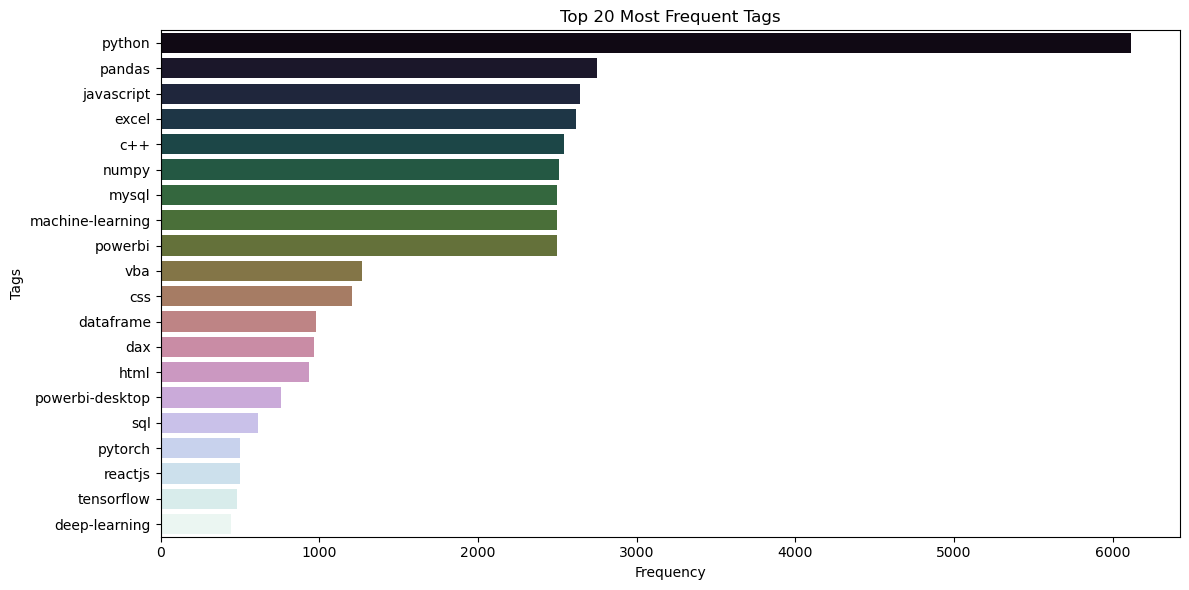

In [60]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Top 20 Most Frequent Tags

# Flatten all tag lists into a single list
all_tags = [tag for tags in df1["tag_list"] for tag in tags]

# Count tag frequencies
tag_counts = Counter(all_tags)
top_tags = tag_counts.most_common(20)

tags, counts = zip(*top_tags)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(tags), palette="cubehelix")
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.tight_layout()
plt.show()


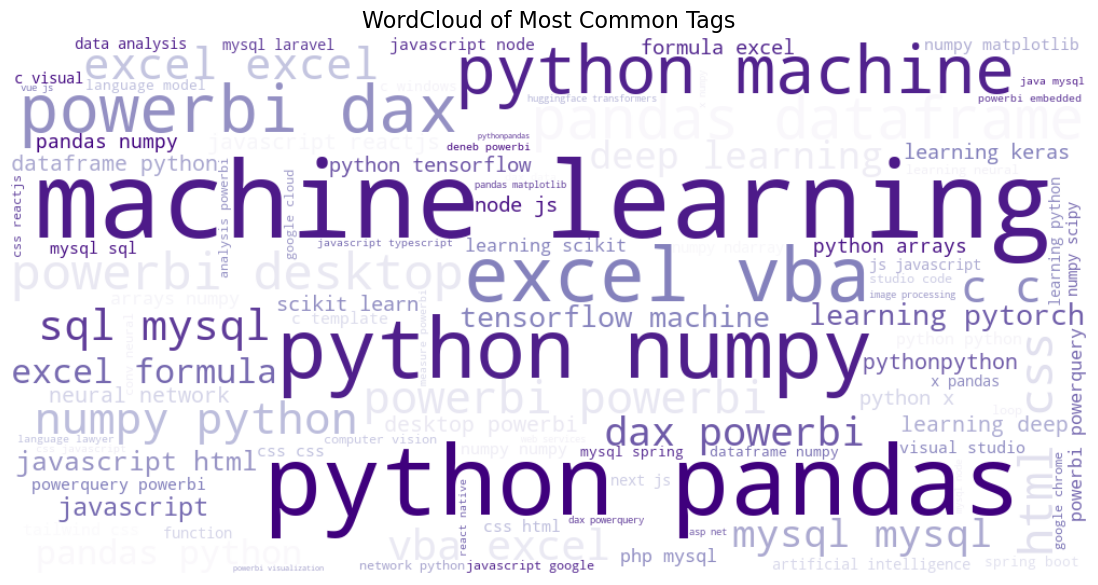

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten all tags from tag_list into a single list
all_tags = [tag for tags in df1['tag_list'] for tag in tags]

# Join all tags into a single string (WordCloud needs string input)
tags_text = " ".join(all_tags)

tag_wordcloud = WordCloud(width=1000,height=500,background_color='white',colormap='Purples',max_words=100).generate(tags_text)

plt.figure(figsize=(15, 7))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Most Common Tags", fontsize=16)
plt.show()


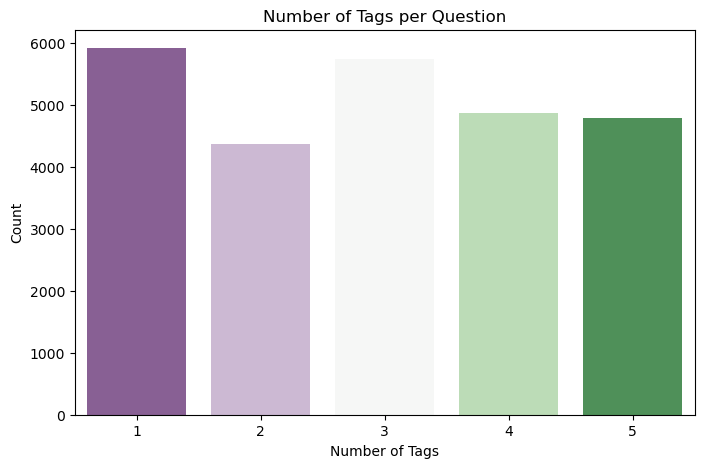

In [63]:
# Number of Tags per Question

# Calculate number of tags per row
df1["num_tags"] = df1["tag_list"].apply(len)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x="num_tags", data=df1, palette="PRGn")
plt.title("Number of Tags per Question")
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.show()


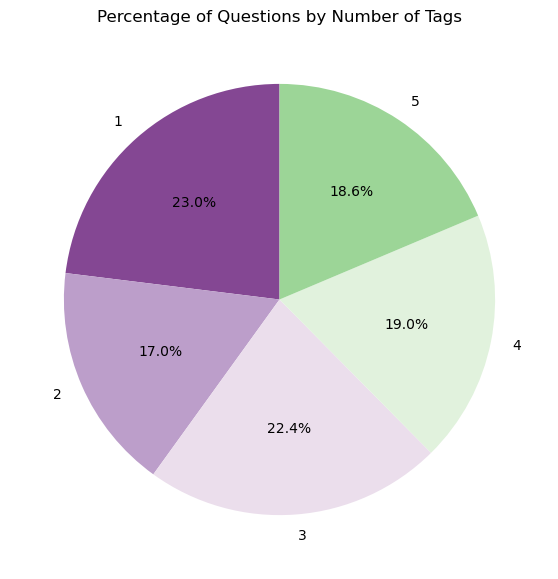

In [67]:
tag_counts = df1["num_tags"].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(tag_counts, labels=tag_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("PRGn"))
plt.title("Percentage of Questions by Number of Tags")
plt.show()



In [36]:
df1["tag_tuple"] = df1["tag_list"].apply(lambda x: tuple(sorted(x)))

In [37]:
df1.head()

,text,tag_list,num_tags,tag_tuple
0,use std filesystem g rais quot not conver...,"[c++, encoding, utf-8]",3,"(c++, encoding, utf-8)"
1,could link execut code dynam librari cross pla...,"[c++, dynamic-linking]",2,"(c++, dynamic-linking)"
2,explicit object member function call pointer a...,"[c++, language-lawyer, explicit-object-parameter]",3,"(c++, explicit-object-parameter, language-lawyer)"
3,quot templat bool requir classnam q...,"[c++, templates, c++-concepts, range-v3]",4,"(c++, c++-concepts, range-v3, templates)"
4,sort contain function take std contain oper ...,"[c++, algorithm, sorting, templates, containers]",5,"(algorithm, c++, containers, sorting, templates)"


In [38]:
df1.drop_duplicates(subset=["text", "tag_tuple"], inplace=True)
df1.drop(columns=["tag_tuple"], inplace=True)

In [39]:
df1.head()

,text,tag_list,num_tags
0,use std filesystem g rais quot not conver...,"[c++, encoding, utf-8]",3
1,could link execut code dynam librari cross pla...,"[c++, dynamic-linking]",2
2,explicit object member function call pointer a...,"[c++, language-lawyer, explicit-object-parameter]",3
3,quot templat bool requir classnam q...,"[c++, templates, c++-concepts, range-v3]",4
4,sort contain function take std contain oper ...,"[c++, algorithm, sorting, templates, containers]",5


In [40]:
df1.shape

(25683, 3)

## Model Building

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(norm='l2',sublinear_tf=True,max_features=10000,ngram_range=(1, 2),stop_words='english',min_df=3,max_df=0.9)
x = tfidf.fit_transform(df1["text"])

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
y = mlb.fit_transform(df1["tag_list"])

In [43]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(20546, 10000) (5137, 10000)
(20546, 10048) (5137, 10048)


In [25]:
x_sample = x_train[:2000]
y_sample = y_train[:2000]


# LogisticRegression

In [29]:
import optuna
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

# Sample reduced dataset for faster tuning
x_sample = x_train[:3000]
y_sample = y_train[:3000]

# Objective function for Optuna
def objective(trial):
    C = trial.suggest_float("C", 1e-3, 10.0, log=True)
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    # Use parallelism for speed
    model = OneVsRestClassifier(
        LogisticRegression(C=C, max_iter=max_iter, solver='lbfgs'), 
        n_jobs=-1
    )

    # KFold cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in kf.split(x_sample):
        X_tr, X_val = x_sample[train_idx], x_sample[val_idx]
        Y_tr, Y_val = y_sample[train_idx], y_sample[val_idx]

        model.fit(X_tr, Y_tr)
        preds = model.predict(X_val)
        f1 = f1_score(Y_val, preds, average='micro')
        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores)

In [30]:
# Run Optuna study with progress bar and fewer trials for quick testing
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Show best result
print("Best Hyperparameters:", study.best_params)

[I 2025-06-13 17:42:21,983] A new study created in memory with name: no-name-bceba7cd-6a85-4da2-8173-2443710c02a8


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-06-13 17:43:16,010] Trial 0 finished with value: 0.0 and parameters: {'C': 0.022111578776515508, 'max_iter': 300}. Best is trial 0 with value: 0.0.
[I 2025-06-13 17:44:02,919] Trial 1 finished with value: 0.2642823786989979 and parameters: {'C': 2.7899582623571195, 'max_iter': 1000}. Best is trial 1 with value: 0.2642823786989979.
[I 2025-06-13 17:44:50,575] Trial 2 finished with value: 0.0 and parameters: {'C': 0.0031700510124813607, 'max_iter': 900}. Best is trial 1 with value: 0.2642823786989979.
[I 2025-06-13 17:45:37,266] Trial 3 finished with value: 0.0 and parameters: {'C': 0.12494409309250316, 'max_iter': 300}. Best is trial 1 with value: 0.2642823786989979.
[I 2025-06-13 17:46:24,418] Trial 4 finished with value: 0.0 and parameters: {'C': 0.015062560030824915, 'max_iter': 400}. Best is trial 1 with value: 0.2642823786989979.
[I 2025-06-13 17:47:12,303] Trial 5 finished with value: 0.0 and parameters: {'C': 0.006869633279155186, 'max_iter': 900}. Best is trial 1 with va

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, classification_report

# Train with best params on full training set
final_model = OneVsRestClassifier(
    LogisticRegression(C=9.159089972097757, max_iter=100, solver='lbfgs'), 
    n_jobs=-1
)

final_model.fit(x_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(C=9.159089972097757),
                    n_jobs=-1)

In [33]:
# --- Step 7: Predict and Evaluate ---
y_pred = final_model.predict(x_test)

print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

F1 Score (Micro): 0.4888867826169376
F1 Score (Macro): 0.004948528746463796

Classification Report:



C:\Users\karthik n\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karthik n\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karthik n\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                     precision    recall  f1-score   support

                                                                               .env       0.00      0.00      0.00         1
                                                                               .net       0.00      0.00      0.00         4
                                                                           .net-4.8       0.00      0.00      0.00         1
                                                                           .net-8.0       0.00      0.00      0.00         0
                                                                           .net-9.0       0.00      0.00      0.00         0
                                                                          .net-core       0.00      0.00      0.00         1
                                                                            128-bit       0.00      0.00      0.00         0

C:\Users\karthik n\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
print("accuracy :",metrics.accuracy_score(y_test,y_pred))
print("macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, y_pred, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,y_pred))

accuracy : 0.08954642787619232
macro f1 score : 0.004948528746463796
micro f1 scoore : 0.4888867826169376
hamming loss : 0.00020894450650891684


## Model Testing

In [42]:
from sklearn.metrics import f1_score, classification_report, hamming_loss, accuracy_score

# Predict on test set
y_pred = final_model.predict(x_test)


In [43]:
# Accuracy (not useful in multilabel)
accuracy = accuracy_score(y_test, y_pred)

# F1 Scores
micro_f1 = f1_score(y_test, y_pred, average='micro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Hamming Loss
hloss = hamming_loss(y_test, y_pred)

# Print results
print("Model Test Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f} (not reliable for multilabel)")
print(f"Micro F1 Score: {micro_f1:.4f}")
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Hamming Loss: {hloss:.6f}")

🔍 Model Test Evaluation Metrics:
✅ Accuracy: 0.0666 (not reliable for multilabel)
✅ Micro F1 Score: 0.3963
✅ Macro F1 Score: 0.0011
✅ Hamming Loss: 0.000225


In [50]:
#Top 10 Tags Only in Report
#Here’s how to show the classification report for top 10 tags correctly:

from sklearn.metrics import classification_report

# Get top 10 tag indices (assumes most frequent or first 10)
top10_labels = list(range(10))  # indices 0 to 9

# Classification report for top 10
print("\n📊 Classification Report (Top 10 Tags):\n")
print(classification_report(
    y_test[:, top10_labels], 
    y_pred[:, top10_labels], 
    target_names=mlb.classes_[:10]
))



📊 Classification Report (Top 10 Tags):

                          precision    recall  f1-score   support

                    .env       0.00      0.00      0.00         1
                    .net       0.00      0.00      0.00         4
                .net-4.8       0.00      0.00      0.00         1
                .net-8.0       0.00      0.00      0.00         0
                .net-9.0       0.00      0.00      0.00         0
               .net-core       0.00      0.00      0.00         1
                 128-bit       0.00      0.00      0.00         0
            2-digit-year       0.00      0.00      0.00         0
2-way-object-databinding       0.00      0.00      0.00         0
                      2d       0.00      0.00      0.00         0

               micro avg       0.00      0.00      0.00         7
               macro avg       0.00      0.00      0.00         7
            weighted avg       0.00      0.00      0.00         7
             samples avg       0.

In [45]:
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                                                                                     precision    recall  f1-score   support

                                                                               .env       0.00      0.00      0.00         1
                                                                               .net       0.00      0.00      0.00         4
                                                                           .net-4.8       0.00      0.00      0.00         1
                                                                           .net-8.0       0.00      0.00      0.00         0
                                                                           .net-9.0       0.00      0.00      0.00         0
                                                                          .net-core       0.00      0.00      0.00         1
                                                                            128-bit       0.00      0.00      0.00         0

In [48]:
sample = 5
for i in range(sample):
    true_tags = [mlb.classes_[idx] for idx in y_test[i].nonzero()[1]]
    pred_tags = [mlb.classes_[idx] for idx in y_pred[i].nonzero()[1]]
    print(f"\nSample {i+1}")
    print("🔹 True Tags:", true_tags)
    print("🔹 Predicted Tags:", pred_tags)



Sample 1
🔹 True Tags: ['machine-learning', 'tensorflow', 'conv-neural-network']
🔹 Predicted Tags: ['machine-learning', 'python']

Sample 2
🔹 True Tags: ['pythonpandasdataframedaskdask-dataframe']
🔹 Predicted Tags: []

Sample 3
🔹 True Tags: ['machine-learning', 'deep-learning', 'python']
🔹 Predicted Tags: []

Sample 4
🔹 True Tags: ['mysql', 'increment', 'select']
🔹 Predicted Tags: ['mysql']

Sample 5
🔹 True Tags: ['android-jetpack-compose', 'excel']
🔹 Predicted Tags: ['excel']


In [152]:
test = df1["text"][1000]
user_data = pd.DataFrame({"text" : [test]})
test

'use mongodbnatvi mongocxx c lib use vcpkg compil mongo c lib  mongocxxdriv  debug see ad  v_noabi  namespac everywher file  folder also variabl type  see imag attach  tri use mongodbnatvi preview variabl valu debugg natvi not includ v_noabi namespac  miss  need compil lib thing v_noabi disabl '

In [57]:
import random

# Choose a valid sample index
sample_index = random.randint(0, x_test.shape[0] - 1)

# Get the text and true tags
test = x_test[sample_index]
true_tags = y_test[sample_index]

# Predict
pred = final_model.predict(test)

# Decode predicted tags
predicted_tags = [tag for tag, val in zip(mlb.classes_, pred.toarray()[0]) if val == 1]
actual_tags = [tag for tag, val in zip(mlb.classes_, true_tags.toarray()[0]) if val == 1]

# Show results
print("📄 Input Question Text:")
print(df1.iloc[sample_index]["text"])  # be sure df1 is aligned with x_test

print("\n✅ Predicted Tags:")
print(predicted_tags)

print("\n🎯 Actual Tags:")
print(actual_tags)


📄 Input Question Text:
c   firemonkey scroll text rectangl c   builder project rad studio   display scroll text   left right   tviewport d  manag simpli take number charact fit area chang start charact howev mani fit put bit string ttext d  scroll text move start charact messag place next charact ttext   effect scroll one charact time   work   give jerki display not alway use full rectangl   wonder possibl render string screen   select part render imag want display copi bit display rectangl   way step graphic pixel pixel want   get consist scroll i possibl render firemonkey text screen buffer     possibl copi part render imag past trect visibl screen   done   text need place background imag   

✅ Predicted Tags:
['javascript']

🎯 Actual Tags:
['cookies', 'dom', 'environment-variables', 'javascript', 'nuxt.js']


In [56]:
x_test.shape

(5137, 10000)

## Model Deployment

In [58]:
import pickle

# Save model
with open("tag_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save label binarizer
with open("mlb_encoder.pkl", "wb") as f:
    pickle.dump(mlb, f)


In [61]:
# Sample new Stack Overflow question
sample_title = "How to convert string to datetime in pandas?"
sample_body = "I have a column in my dataframe with date strings. How can I convert them to datetime objects?"

# Combine title and body as done in training
sample_text = sample_title + " " + sample_body

# Transform input using TF-IDF
sample_vector = tfidf.transform([sample_text])

# Predict using trained model
predicted = final_model.predict(sample_vector)

# Decode back to tag names
predicted_tags = mlb.inverse_transform(predicted)

# Output
print("🔍 Predicted Tags:")
print(predicted_tags[0] if predicted_tags else "No tags predicted.")


🔍 Predicted Tags:
()


# SGDClassifier

In [62]:
# import optuna
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import StratifiedKFold, KFold
# from optuna.samplers import TPESampler

In [73]:
import optuna
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, KFold

def objective(trial):
    # Suggest hyperparameters
    loss = trial.suggest_categorical('loss', ['log_loss', 'hinge', 'modified_huber'])
    max_iter = trial.suggest_int('max_iter', 5, 100)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])

    # Define model
    model = OneVsRestClassifier(
        SGDClassifier(
            loss=loss,
            alpha=alpha,
            penalty=penalty,
            max_iter=max_iter,
            random_state=42,
            tol=None
        ),
        n_jobs=-1
    )

    # KFold Cross-validation
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, x_sample, y_sample.toarray(), scoring='f1_micro', cv=kf).mean()
    return score

In [74]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2025-06-13 11:16:59,624] A new study created in memory with name: no-name-ccfdb95e-3526-4e99-b4be-dc97885438be
[I 2025-06-13 11:19:10,461] Trial 0 finished with value: 0.1981711801185071 and parameters: {'loss': 'log_loss', 'max_iter': 61, 'alpha': 0.0004046410260211304, 'penalty': 'elasticnet'}. Best is trial 0 with value: 0.1981711801185071.
[I 2025-06-13 11:20:11,175] Trial 1 finished with value: 0.25009325096442164 and parameters: {'loss': 'modified_huber', 'max_iter': 93, 'alpha': 0.0007775335889253771, 'penalty': 'l2'}. Best is trial 1 with value: 0.25009325096442164.
[I 2025-06-13 11:22:02,571] Trial 2 finished with value: 0.0 and parameters: {'loss': 'log_loss', 'max_iter': 51, 'alpha': 0.011595706268641906, 'penalty': 'elasticnet'}. Best is trial 1 with value: 0.25009325096442164.
[I 2025-06-13 11:23:19,110] Trial 3 finished with value: 0.36084156415547536 and parameters: {'loss': 'hinge', 'max_iter': 56, 'alpha': 0.00024506367700871114, 'penalty': 'elasticnet'}. Best is tr

In [75]:
import time
start = time.time()
end = time.time()
print("Wall Time:", end - start, "seconds")
print("Best Score:", study.best_value)
print("Best Parameters:", study.best_params)

Wall Time: 0.0 seconds
Best Score: 0.4554795708592511
Best Parameters: {'loss': 'modified_huber', 'max_iter': 27, 'alpha': 6.267736761683271e-05, 'penalty': 'l1'}


In [47]:
from sklearn.metrics import classification_report, hamming_loss, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier


# Train final model
final_model = OneVsRestClassifier(
    SGDClassifier(
        loss='modified_huber',
        max_iter=27,
        alpha= 6.267736761683271e-05,
        penalty='l1',
        random_state=42,
        tol=None
    ),
    n_jobs=-1
)

final_model.fit(x_train, y_train)

# Predict
y_pred = final_model.predict(x_test)

# Evaluate
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Hamming Loss: 0.00021353605477434224
Accuracy Score: 0.0825384465641425
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         1
          15       0.00      0.00      

In [49]:
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score

In [50]:
print("accuracy :",metrics.accuracy_score(y_test,y_pred))
print("macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, y_pred, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,y_pred))

accuracy : 0.0825384465641425
macro f1 score : 0.006546681985854944
micro f1 scoore : 0.47378974505872246
hamming loss : 0.00021353605477434224


C:\Users\karthik n\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
sample = 5
for i in range(sample):
    true_tags = [mlb.classes_[idx] for idx in y_test[i].nonzero()[1]]
    pred_tags = [mlb.classes_[idx] for idx in y_pred[i].nonzero()[1]]
    print(f"\nSample {i+1}")
    print("🔹 True Tags:", true_tags)
    print("🔹 Predicted Tags:", pred_tags)



Sample 1
🔹 True Tags: ['machine-learning', 'tensorflow', 'conv-neural-network']
🔹 Predicted Tags: ['machine-learning', 'python']

Sample 2
🔹 True Tags: ['pythonpandasdataframedaskdask-dataframe']
🔹 Predicted Tags: ['dask']

Sample 3
🔹 True Tags: ['machine-learning', 'deep-learning', 'python']
🔹 Predicted Tags: []

Sample 4
🔹 True Tags: ['mysql', 'increment', 'select']
🔹 Predicted Tags: ['pdo', 'php']

Sample 5
🔹 True Tags: ['android-jetpack-compose', 'excel']
🔹 Predicted Tags: ['excel']


In [52]:
import random

# Choose a valid sample index
sample_index = random.randint(0, x_test.shape[0] - 1)

# Get the text and true tags
test = x_test[sample_index]
true_tags = y_test[sample_index]

# Predict
pred = final_model.predict(test)

# Decode predicted tags
predicted_tags = [tag for tag, val in zip(mlb.classes_, pred.toarray()[0]) if val == 1]
actual_tags = [tag for tag, val in zip(mlb.classes_, true_tags.toarray()[0]) if val == 1]

# Show results
print("📄 Input Question Text:")
print(df1.iloc[sample_index]["text"])  # be sure df1 is aligned with x_test

print("\n✅ Predicted Tags:")
print(predicted_tags)

print("\n🎯 Actual Tags:")
print(actual_tags)


📄 Input Question Text:
c coroutin use nonintrus resum caller calle across chain function call  imagin exist system call chain entri         final   sever variat chain entri     b     final   entri     c     final   etc  final   big complex function primari loop  take gener state structur hold need  function pass state structur along  imagin loop       lot complic stuff  eventu return given condit print   loop count    counter    want return  yield   control control describ  want control flow final   loop extern  control   someth like  control    some_mag  coroutine_spel      more_mag  entri    call chain occur  end final   continue_fin    final resum  print  loop count   paus next loop continue_fin    final resum  print  loop count   paus next loop etc  way someth like without total rework substanc call chain  add whatev want state structur  third parti librari would realli rather not tri muck intern necessari  would like insert someth line two final succinctli possibl  mess around cor

In [53]:
test = df1["text"][1000]
user_data = pd.DataFrame({"text" : [test]})
test

'use mongodbnatvi mongocxx c lib use vcpkg compil mongo c lib  mongocxxdriv  debug see ad  v_noabi  namespac everywher file  folder also variabl type  see imag attach  tri use mongodbnatvi preview variabl valu debugg natvi not includ v_noabi namespac  miss  need compil lib thing v_noabi disabl '

In [54]:
# Sample new Stack Overflow question
sample_title = "How to convert string to datetime in pandas?"
sample_body = "I have a column in my dataframe with date strings. How can I convert them to datetime objects?"

# Combine title and body as done in training
sample_text = sample_title + " " + sample_body

# Transform input using TF-IDF
sample_vector = tfidf.transform([sample_text])

# Predict using trained model
predicted = final_model.predict(sample_vector)

# Decode back to tag names
predicted_tags = mlb.inverse_transform(predicted)

# Output
print("🔍 Predicted Tags:")
print(predicted_tags[0] if predicted_tags else "No tags predicted.")


🔍 Predicted Tags:
()


In [56]:
import pickle

# Save model
with open("tag_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save label binarizer
with open("mlb_encoder.pkl", "wb") as f:
    pickle.dump(mlb, f)
